# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organizing Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

## Challenge

In this challenge, you need to implement a SOM such that it can categorise a set of random 3-dimensional colours.  The output should be an image of the organised data.  

### Expectations and Criteria
- Be prepared to talk through your decisions & thinking (we encourage you to include these in code comments too!)
- You may use any language you like (the examples given below are using Python)
- Avoid libraries that would do too much of the work for you. For example, in Python a good approach would be to use `numpy`, but no packages with SOM specific functionality
- Try and make your code as efficient as possible. Feel free to deviate from a literal interpretation of the instructions given under the **Training** heading above
- Consider the best way to structure your code and code base for later use by other developers or in anticipation of productionisation (you don't need to use a Jupyter Notebook)
- Include any tests you may have used (tests are not required however)
- Include a `Dockerfile` to package your code for production
- Be prepared to discuss your approach and process to productionise this application
- You can use code below to generate the trainig data of 10 colours:

### 2. Train a 10x10 network over 100 iterations

- Training data is a random set of 20 colours
- How long does this take?
- What does the map look like? (You will need to translate the weights of each node in the map to pixel data)
- What does this look like if you perform 200 & 500 iterations?

### 3. Train a 100x100 network over 1000 iterations

- This network will likely be significantly slower to train
- What could you do to improve performance?
- What does the network look like after 1000 iterations?

In [14]:
import numpy as np
from scipy.stats import multivariate_normal
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
class kohonen():
    """example usage: 
    som = kohonen(5,5,np.random.random((20, 3)), n_iter=100)
    som.train()
    indices = som.predict(np.random.random((1000,1)))
    preds = np.zeros(indices.shape)
    for i, index in enumerate(indices):
        preds[i] = som.grid[0][index]
    preds = np.atleast_2d(preds)
    plt.imshow(som.grid, cmap="Spectral")
    plt.title('grid after 100 iterations')
    plt.imshow(preds.reshape(10,100), cmap='Spectral')"""
    def __init__(self, width, height, input_data, n_iter=100):
        self.width = width
        self.height = height
        self.n_nodes = self.width*self.height
        self.input_data = input_data
        self.n_iter = n_iter
        self.sigma_0 = max(self.height, self.width) / 2
        self.grid = np.random.random((self.width, self.height, self.input_data.shape[0]))
        self.sigma_0 = max(self.grid.shape[0], self.grid.shape[1])/2
        self.grid = self.grid.reshape(self.grid.shape[0]*self.grid.shape[1], self.input_data.shape[0])
        self.lambd = self.n_iter/np.log(self.sigma_0)

    def dist(self, x , y): 
        """euclidean distance metric"""
        return np.linalg.norm(x-y)
    
    def calc_neighbourhood_radius(self, sigma_0, t):
        """calculation of neighbourood radius using decaing exponential"""
        return sigma_0*np.exp(-(t/self.lambd))
    
    def learning_rate(self, t, initial_lr=0.1):
        """calculation of learning rate using decaing exponential"""
        return initial_lr*np.exp(-t/self.lambd)
    
    def train(self):
        for current_time in range(1, self.n_iter+1):
            print(current_time)
            cur_neighborhood_radius = self.calc_neighbourhood_radius(self.sigma_0, current_time)
            current_lr = self.learning_rate(current_time)
            current_input_vector = (self.input_data.T[np.random.choice(self.input_data.shape[1])])
            theta_vals = {}
            cur_influence = {}
            nodes_dist_cur = {}
            best_dist = np.inf
            for idx2, val in enumerate(self.grid): # find the smallest distance in the grid
                cur_dist = self.dist(val, current_input_vector)
                nodes_dist_cur[idx2] = cur_dist
                if cur_dist < best_dist:
                    best_dist = cur_dist
                    BMU = idx2  # set the BMU to node with smallest distance
            result = np.zeros(self.height*self.width)
            for key, val in nodes_dist_cur.items():
                result[key] = val
            good_indices = np.argwhere(result<cur_neighborhood_radius) # find indices of nodes which are below threshold for neighborhood radius
            good_indices = good_indices[good_indices!=BMU]
            for val in good_indices:
                # function I chose to use for this calculation (with the euclidean distance) is the multivariate normal distribution 
                cur_influence[val] = self.dist(multivariate_normal.pdf(self.grid[BMU]), multivariate_normal.pdf(self.grid[val]))
                # get the theta vals
                theta_vals[val] = np.exp(-((cur_influence[val]**2)/(2*(cur_neighborhood_radius)**2)))
            previous_state_grid = self.grid.copy()
            # update the weights for the grid
            for key, val in theta_vals.items():
                self.grid[key] = self.grid[key] + current_lr*theta_vals[key]*(current_input_vector-self.grid[key])
            if np.allclose(previous_state_grid, self.grid, rtol=1e-02, atol=1e-02):
                break
        return self.grid
    
    def predict(self, samples):
        """use this function for predicting the label for a random color"""
        result = []
        for sample in samples.ravel():
            distances = cdist(self.grid[0][:,None], np.atleast_2d(sample), metric='euclidean')
            indices = np.argwhere(distances==distances.min())
            result.append(indices[0,0])
        return np.array(result)



### 1. Implement a Kohonen network
- Use the above description to implement a Kohonen network
- Make sure you can configure the size of the input vector and the size of the map
- Make sure node's weights are initialized to random values

In [3]:
# Generate Data
import numpy as np
input_data = np.random.random((10,3))
input_data

array([[0.51233985, 0.91411423, 0.85604135],
       [0.15282831, 0.80546827, 0.29262641],
       [0.39513244, 0.56797458, 0.16118512],
       [0.29484338, 0.81575272, 0.54711364],
       [0.36793674, 0.4485905 , 0.06070865],
       [0.24947131, 0.04495051, 0.28693613],
       [0.01096796, 0.6254668 , 0.37920729],
       [0.03811757, 0.95483206, 0.97917686],
       [0.65123375, 0.2653825 , 0.66816935],
       [0.16032272, 0.27236429, 0.75605086]])

Text(0.5, 1.0, 'grid after 10 iterations')

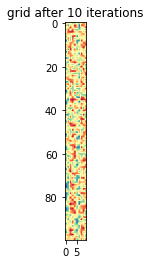

In [186]:
som = kohonen(10,10,input_data, n_iter=10)
som.train()
plt.imshow(som.grid, cmap="Spectral")
plt.title('grid after 10 iterations')

it took 1.7300467491149902 seconds to train


Text(0.5, 1.0, 'grid after 100 iterations')

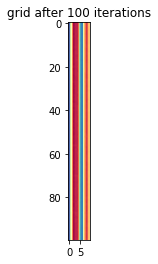

In [190]:
# network has almost converged already after 100 iterations
import time
som = kohonen(10,10,input_data, n_iter=100)
start_time = time.time()
som.train()
end_time = time.time()-start_time
print(f'it took {end_time} seconds to train')
plt.imshow(som.grid, cmap="Spectral")
plt.title('grid after 100 iterations')

In [ ]:
som = kohonen(100,100,input_data, n_iter=1000)
import time
start_time = time.time()
som.train()
end_time = start_time - time.time()
print('1000 iterations took {end_time} seconds')

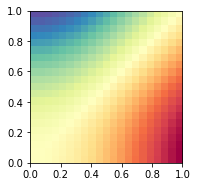

In [145]:
xx, yy = np.meshgrid(np.linspace(0,1,som.grid.shape[0]), np.linspace(0,1,som.grid.shape[0]))

data = som.grid.T @ xx + som.grid.T @ yy

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.imshow(data, cmap='Spectral', interpolation='nearest', origin='lower', extent=[0,1,0,1])


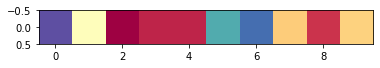

In [10]:
# network convergence seen below
plt.imshow(np.atleast_2d(som.grid[0]), cmap='Spectral')

In [ ]:
# this just shows how to generate random predictions. 
indices = som.predict(np.random.random((1000,1)))
preds = np.zeros(indices.shape)
for i, index in enumerate(indices):
    preds[i] = som.grid[0][index]
preds = np.atleast_2d(preds)
# this just shows a colormap where each random data point has landed
plt.imshow(preds.reshape(10,100), cmap='Spectral')

The network took a lot longer to train after 1000 iterations, as expected.
As can be seen in one of the cells above, it only took 1.73 seconds to train the model using a 100*100 grid with 100 iterations.
In order to optimise the network, I could have used vectorised calculations such as 'cdist' found in scipy.spatial.distance, as opposed to the inner most 'nested for loop' used in the 'train' method of my network:
```
distances = cdist(np.atleast_2d(current_input_vector), som.grid, metric='euclidean')
indices = np.where(distances == distances.min()) 
```
Additionaly, writing some of the code using Numba (with a JIT compiler), or writing some of the code in Cython would probably give the network an additional speed-up.
